# Authors: Nazmi Bunjaku (2775692), Geri Bakushi (2819369)
# CIS 492 - Big Data Analytics
# Professor Sunnie Chung
# Final Project - IMDB Sentiment Analysis
# May 05, 2023

### Import necessary packages/libraries

In [4]:
# Import necessary libraries
import pandas as pd
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/besabunjaku/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Sentiment Analysis on Each Line

In [5]:
# Reading/Wrangling of Data
df_avatar = pd.read_csv('avatar.csv', engine='python', encoding='ISO-8859-1')
df_avatar_lines = df_avatar.groupby('character').count()
df_avatar_lines = df_avatar_lines.sort_values(by=['character_words'], ascending=False)[:10]
top_character_names = df_avatar_lines.index.values

# Filtering out Non-Top Characters
df_char_sentiment = df_avatar[df_avatar['character'].isin(top_character_names)]
df_char_sentiment = df_char_sentiment[['character', 'character_words']]

# Calculating Sentiment Score(s)
sid = SentimentIntensityAnalyzer()
df_char_sentiment.reset_index(inplace=True, drop=True)
df_char_sentiment[['neg', 'neu', 'pos', 'compound']] = df_char_sentiment['character_words'].apply(sid.polarity_scores).apply(pd.Series)
df_char_sentiment

,character,character_words,neg,neu,pos,compound
0,Katara,Water. Earth. Fire. Air. My grandmother used t...,0.196,0.735,0.069,-0.9718
1,Sokka,It's not getting away from me this time. Watc...,0.000,1.000,0.000,0.0000
2,Katara,"Sokka, look!",0.000,1.000,0.000,0.0000
3,Sokka,"Sshh! Katara, you're going to scare it away. ...",0.200,0.800,0.000,-0.5411
4,Katara,"But, Sokka! I caught one!",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
7053,Zuko,At least you don't look like a boar-q-pine! My...,0.183,0.817,0.000,-0.4007
7054,Suki,And why did you paint me firebending?,0.000,1.000,0.000,0.0000
7055,Sokka,I thought it looked more exciting that way. O...,0.000,0.687,0.313,0.7501
7056,Iroh,"Hey, my belly's not that big anymore. I've rea...",0.000,1.000,0.000,0.0000


### Sentiment Analysis on Each Character

In [6]:
# Sentiment of Each Character (mean)
df_char_sentiment = df_char_sentiment.groupby('character').mean().round(3).sort_values('pos', ascending=True)
df_char_sentiment.reset_index(inplace=True)
df_char_sentiment

,character,neg,neu,pos,compound
0,Zhao,0.135,0.753,0.112,-0.039
1,Zuko,0.100,0.789,0.112,0.026
2,Sokka,0.097,0.789,0.115,0.023
3,Katara,0.091,0.787,0.122,0.045
4,Azula,0.090,0.784,0.127,0.080
5,Suki,0.090,0.783,0.127,0.086
6,Jet,0.090,0.777,0.133,0.063
7,Toph,0.084,0.776,0.140,0.074
8,Aang,0.075,0.782,0.143,0.083
9,Iroh,0.077,0.754,0.169,0.164


### Visualizing the Sentiment Analysis

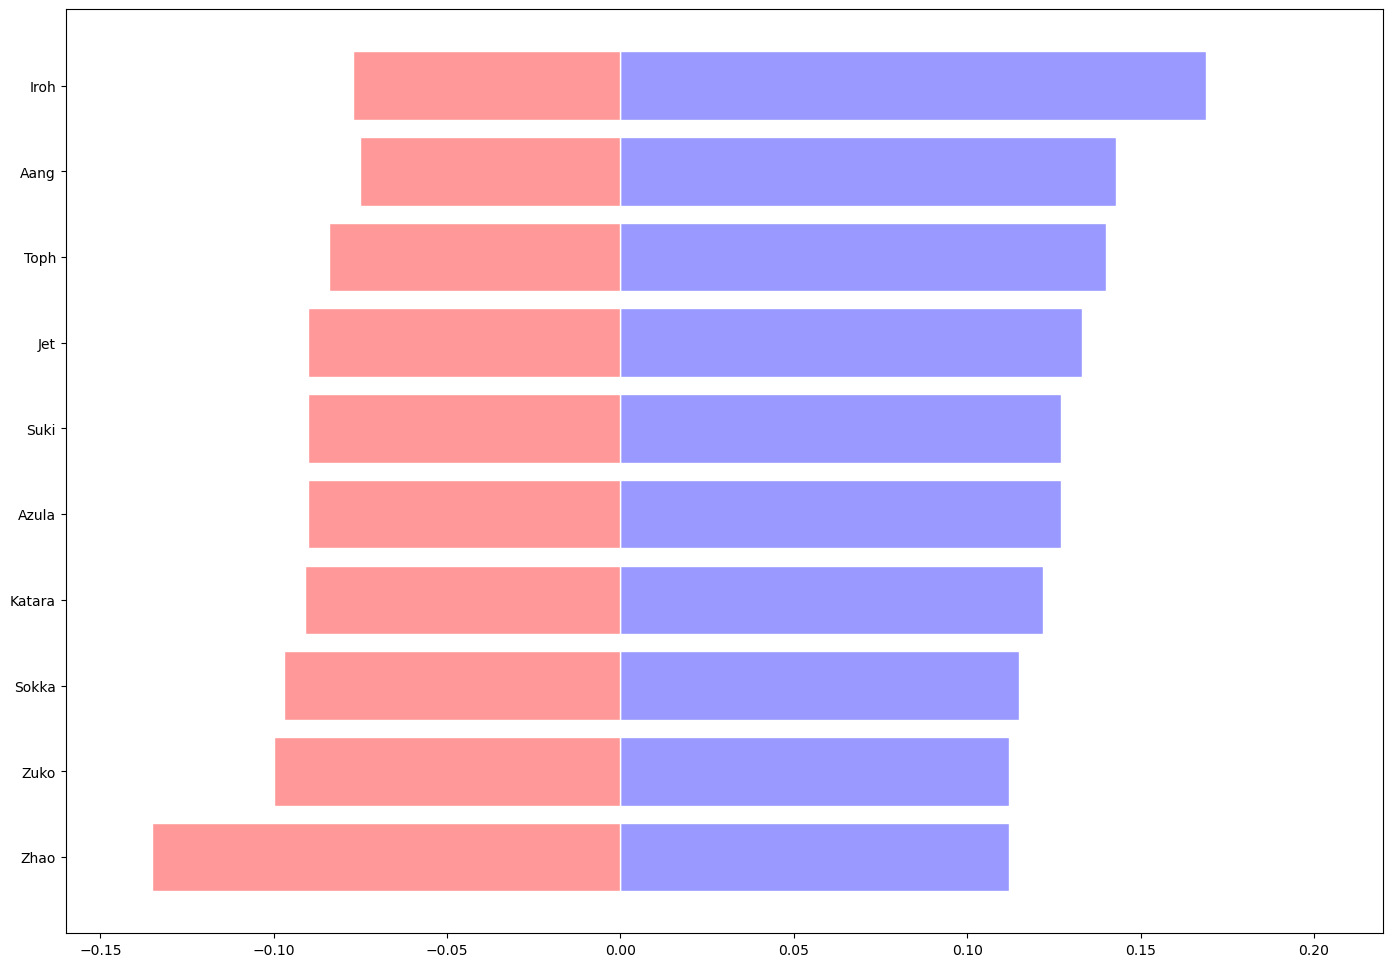

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Preparing data
X = np.arange(len(df_char_sentiment['pos']))

# Bar Graph
fig = plt.figure(figsize = (17,12))
plt.barh(X, df_char_sentiment['pos'], facecolor='#9999ff', edgecolor='white')
plt.barh(X, -df_char_sentiment['neg'], facecolor='#ff9999', edgecolor='white')

plt.xlim([-.16,.22])
plt.yticks(ticks=X, labels=df_char_sentiment['character'], rotation='0')
plt.show()

### Named Entity Recognition (NER)

In [11]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Biden invites Ukrainian President Volodymyr Zelensky to the White House this Summer to discuss international affairs, and the ongoing conflict/war in Ukraine-Russia.")
print([(X.text, X.label_) for X in doc.ents])

[('Biden', 'PERSON'), ('Ukrainian', 'NORP'), ('Volodymyr Zelensky', 'PERSON'), ('the White House', 'ORG'), ('this Summer', 'DATE'), ('Ukraine', 'GPE'), ('Russia', 'GPE')]


### Stemming

### Lemmatization

### Bag of Wors (BoW)

### TF-IDF

### Wordcloud